In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../scripts")
# from data_cleaner import Data_cleaner
from util import Util
from data_cleaner import DataCleaner
from plotter import Plotter

In [7]:
util = Util()
cleaner= DataCleaner()
plotter = Plotter()

### Our DVC tags are
- 'sample-v0' - the original sample_submission dataset
- 'store-v0' - the original store dataset
- 'store-v1' - the cleaned store dataset
- 'test-v0' - the original test dataset
- 'test-v1' - the cleaned test dataset
- 'train-v0' - the original train dataset
- 'train-v1' - the cleaned train dataset

In [8]:
# read our merged train and test dataset

repo="https://github.com/Nathnael12/pharmaceutical-sales-pridiction.git"
repo="../"

store=util.read_from_dvc("data/store.csv",repo,"store-v1",low_memory=False)
complete_test=util.read_from_dvc("data/test.csv",repo,"test-v2",low_memory=False)
complete_train=util.read_from_dvc("data/train.csv",repo,"train-v2",low_memory=False)

In [9]:
complete_test.isnull().sum()

Store                            0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                17232
Id                               0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
dtype: int64

In [10]:
complete_train.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

The only left column is 'Open' we can fill that with 0 and assume the store is not open on that specific date

In [11]:
complete_test[complete_test["Open"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
22992,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,480,4,2015-09-17,NaN,1,0,0
22993,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,1336,3,2015-09-16,NaN,1,0,0
22994,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,2192,2,2015-09-15,NaN,1,0,0
22995,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,3048,1,2015-09-14,NaN,1,0,0
22997,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,4760,6,2015-09-12,NaN,0,0,0
22998,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,5616,5,2015-09-11,NaN,0,0,0
22999,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,6472,4,2015-09-10,NaN,0,0,0
23000,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,7328,3,2015-09-09,NaN,0,0,0
23001,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,8184,2,2015-09-08,NaN,0,0,0
23002,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,NaN,9040,1,2015-09-07,NaN,0,0,0


In [12]:
complete_test=cleaner.fill_zeros(complete_test,["Open"])

In [18]:
complete_train_date_indexed=complete_train.copy()
complete_train_date_indexed.set_index(pd.to_datetime(complete_train_date_indexed["Date"]),inplace=True)
complete_train_date_indexed.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,5,2015-07-31,5263,555,1,1,0,1
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,4,2015-07-30,5020,546,1,1,0,1
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,3,2015-07-29,4782,523,1,1,0,1
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,2,2015-07-28,5011,560,1,1,0,1
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,1,2015-07-27,6102,612,1,1,0,1


In [19]:
# The range of our dataset is

print(f"From {complete_train.Date.min()} to {complete_train.Date.max()}")

From 2013-01-01 to 2015-07-31


Let's check the correlation among some fields (Bivariate Analysis)

In [20]:
# since sales is our target feature let's focus on that

corr=complete_train_date_indexed.corr()['Sales']
corr

Store                        0.005126
CompetitionDistance         -0.018869
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Name: Sales, dtype: float64

we can see that sales is highly related with customers, and the fact that whether the store is open or not

<AxesSubplot:>

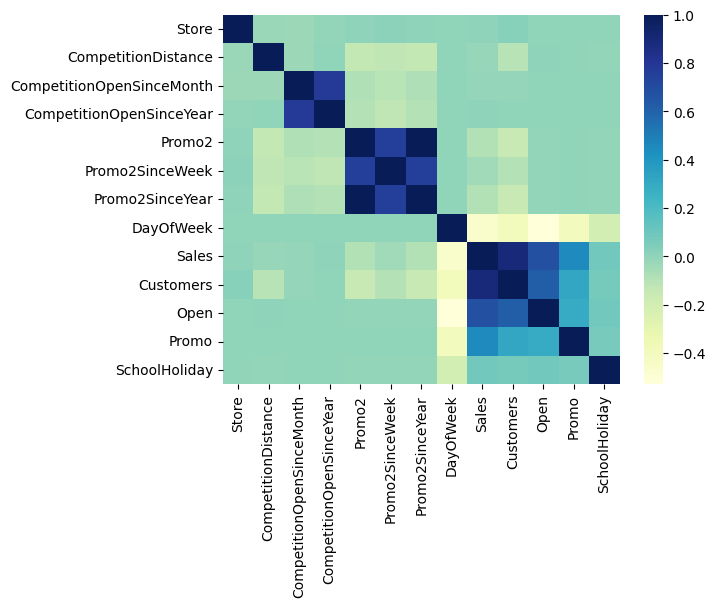

In [21]:
sns.heatmap(complete_train_date_indexed.corr(), cmap="YlGnBu")

In [22]:
customer_sales=complete_train_date_indexed.groupby(complete_train_date_indexed.index.month).agg({"Sales":"mean","Customers":"mean"})

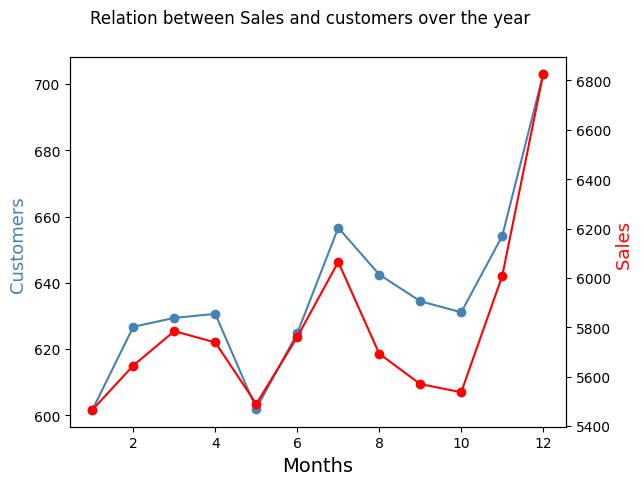

In [23]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

# explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")

#add first line to plot
ax.plot(customer_sales['Customers'], color=col1,linestyle='-', marker='o')

#add x-axis label
ax.set_xlabel('Months', fontsize=14)

#add y-axis label
ax.set_ylabel('Customers ', color=col1, fontsize=13)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(customer_sales['Sales'], color=col2,linestyle='-', marker='o')

plt.suptitle("Relation between Sales and customers over the year")
#add second y-axis label
ax2.set_ylabel('Sales ', color=col2, fontsize=13)
plt.show()

- From the above plot we can see a very steep increase in sales and customers towards the end of the year. January(1), May(5) and October(10) is when we have the lowest average sales.
- The graph of the average number of customers per month resembles the graph of the average sales per month. This shows there is some correlation between average sales and average customers.

***
- Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [24]:
test_promo = complete_test['Promo']
train_promo = complete_train_date_indexed['Promo']

c:\Users\natnael.masresha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\natnael.masresha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


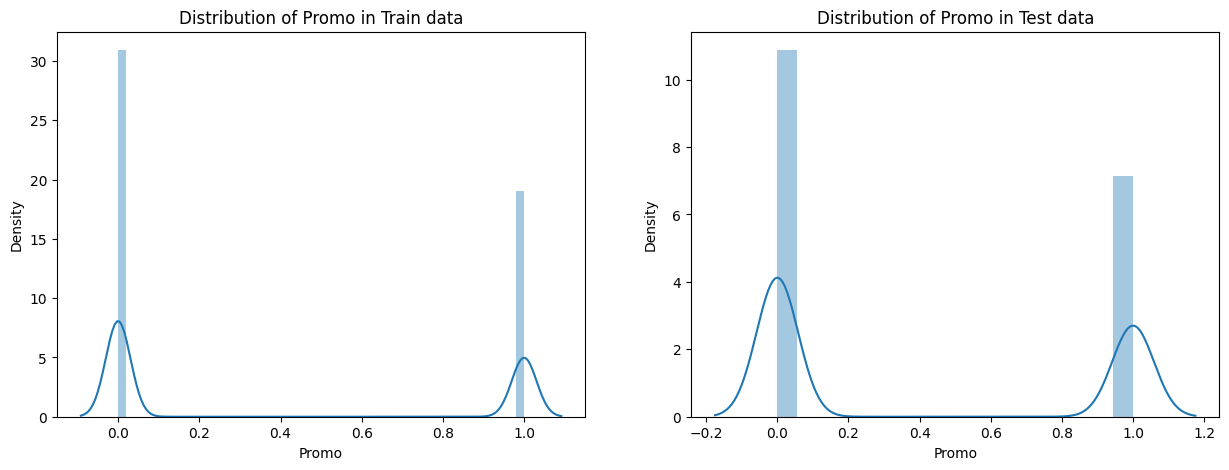

In [25]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_promo, ax=axes[0])
axes[0].set_title('Distribution of Promo in Train data')
sns.distplot(test_promo, ax=axes[1])
axes[1].set_title('Distribution of Promo in Test data')
plt.show()

- Check & compare sales behavior before, during and after holidays
> we will focus on these two specific columns `StateHoliday` and `SchoolHoliday`
> - StateHoliday : **Public Holiday**('a'), **Easter Holiday**('b'), **Christmas Holiday**('c'), and  **None**('0'),
> - SchooldHoliday : **Store & Date were affected by closure of public schools**('1'), **'0' otherwise**